# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
''' #https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
'''

' #https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing\n!pip install gdown\n!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-\n'

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("Bus_Breakdown_and_Delays.csv")

In [4]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [5]:
df.columns

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

In [6]:
'''categorical_cols = df.select_dtypes(include=['object','category']).columns

for col in categorical_cols:
    print(df[col].value_counts())
    print("\n")'''

'categorical_cols = df.select_dtypes(include=[\'object\',\'category\']).columns\n\nfor col in categorical_cols:\n    print(df[col].value_counts())\n    print("\n")'

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [7]:
df.shape

(147972, 21)

In [8]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [9]:
df.isnull().sum()

School_Year                             0
Busbreakdown_ID                         0
Run_Type                               89
Bus_No                                  0
Route_Number                           88
Reason                                102
Schools_Serviced                        0
Occurred_On                             0
Created_On                              0
Boro                                 6318
Bus_Company_Name                        0
How_Long_Delayed                    21630
Number_Of_Students_On_The_Bus           0
Has_Contractor_Notified_Schools         0
Has_Contractor_Notified_Parents         0
Have_You_Alerted_OPT                    0
Informed_On                             0
Incident_Number                    142340
Last_Updated_On                         0
Breakdown_or_Running_Late               0
School_Age_or_PreK                      0
dtype: int64

In [10]:
df.dtypes

School_Year                        object
Busbreakdown_ID                     int64
Run_Type                           object
Bus_No                             object
Route_Number                       object
Reason                             object
Schools_Serviced                   object
Occurred_On                        object
Created_On                         object
Boro                               object
Bus_Company_Name                   object
How_Long_Delayed                   object
Number_Of_Students_On_The_Bus       int64
Has_Contractor_Notified_Schools    object
Has_Contractor_Notified_Parents    object
Have_You_Alerted_OPT               object
Informed_On                        object
Incident_Number                    object
Last_Updated_On                    object
Breakdown_or_Running_Late          object
School_Age_or_PreK                 object
dtype: object

In [11]:
df.sample(5)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
119246,2016-2017,1340461,Special Ed AM Run,5409,L926,Heavy Traffic,17138,04/20/2017 07:41:00 AM,04/20/2017 07:42:00 AM,NaN,...,20 MIN,2,Yes,Yes,Yes,04/20/2017 07:42:00 AM,NaN,04/20/2017 07:42:09 AM,Running Late,School-Age
129578,2016-2017,1351173,Special Ed AM Run,1367,M352,Heavy Traffic,02533,05/22/2017 07:06:00 AM,05/22/2017 07:06:00 AM,Manhattan,...,20MNTS,0,Yes,Yes,No,05/22/2017 07:06:00 AM,NaN,05/22/2017 07:06:45 AM,Running Late,School-Age
67599,2016-2017,1288368,Special Ed AM Run,NI0932,K118,Heavy Traffic,75907,09/27/2016 07:00:00 AM,09/27/2016 07:11:00 AM,Brooklyn,...,20 min,0,Yes,Yes,No,09/27/2016 07:11:00 AM,NaN,09/27/2016 09:46:31 AM,Running Late,School-Age
116053,2016-2017,1337283,Pre-K/EI,9345,2,Heavy Traffic,C530,04/03/2017 08:01:00 AM,04/03/2017 08:04:00 AM,Bronx,...,20 MINS,6,Yes,Yes,No,04/03/2017 08:04:00 AM,NaN,04/03/2017 08:04:14 AM,Running Late,Pre-K
80539,2016-2017,1301328,Special Ed AM Run,1333,Q192,Flat Tire,30234,11/21/2016 06:26:00 AM,11/21/2016 06:29:00 AM,Queens,...,1 Hour,0,Yes,Yes,Yes,11/21/2016 06:29:00 AM,NaN,11/21/2016 09:00:20 AM,Running Late,School-Age


In [12]:
conv_numerical_cols = ['Number_Of_Students_On_The_Bus']
conv_categorical_cols = ['School_Year','Busbreakdown_ID','Run_Type','Bus_No','Route_Number','Reason','Breakdown_or_Running_Late','School_Age_or_PreK'
                         'Boro','Bus_Company_Name','How_Long_Delayed','Number_Of_Students_On_The_Bus','Has_Contractor_Notified_Schools','Has_Contractor_Notified_Parents','Have_You_Alerted_OPT']

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


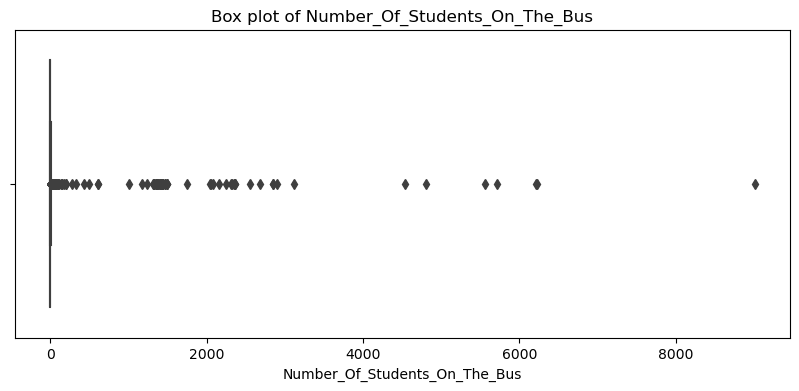

In [13]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Number_Of_Students_On_The_Bus'])
plt.title('Box plot of Number_Of_Students_On_The_Bus')
plt.show()

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [14]:
df[['School_Age_or_PreK','Breakdown_or_Running_Late','Have_You_Alerted_OPT','Has_Contractor_Notified_Parents','Has_Contractor_Notified_Schools','Boro','Bus_Company_Name',
     'Schools_Serviced','Reason','Bus_No','Run_Type','Busbreakdown_ID','School_Year']] = df[['School_Age_or_PreK','Breakdown_or_Running_Late','Have_You_Alerted_OPT','Has_Contractor_Notified_Parents','Has_Contractor_Notified_Schools','Boro','Bus_Company_Name',
     'Schools_Serviced','Reason','Bus_No','Run_Type','Busbreakdown_ID','School_Year']].astype('str')

In [15]:
df.dtypes

School_Year                        object
Busbreakdown_ID                    object
Run_Type                           object
Bus_No                             object
Route_Number                       object
Reason                             object
Schools_Serviced                   object
Occurred_On                        object
Created_On                         object
Boro                               object
Bus_Company_Name                   object
How_Long_Delayed                   object
Number_Of_Students_On_The_Bus       int64
Has_Contractor_Notified_Schools    object
Has_Contractor_Notified_Parents    object
Have_You_Alerted_OPT               object
Informed_On                        object
Incident_Number                    object
Last_Updated_On                    object
Breakdown_or_Running_Late          object
School_Age_or_PreK                 object
dtype: object

Deal with nulls

In [16]:
df.drop(columns=['Incident_Number','How_Long_Delayed','Informed_On','Last_Updated_On','School_Year','Run_Type'], inplace=True)

In [17]:
df.head()

,Busbreakdown_ID,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
0,1224901,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,"G.V.C., LTD.",5,Yes,Yes,No,Running Late,Pre-K
1,1225098,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,"G.V.C., LTD.",3,Yes,Yes,No,Running Late,Pre-K
2,1215800,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,"G.V.C., LTD.",12,Yes,Yes,Yes,Running Late,Pre-K
3,1215511,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,"G.V.C., LTD.",11,Yes,Yes,Yes,Running Late,Pre-K
4,1215828,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,"G.V.C., LTD.",12,Yes,Yes,No,Running Late,Pre-K


In [18]:
df['Boro'].mode()

0    Bronx
Name: Boro, dtype: object

In [19]:
df['Boro'].fillna('Bronx',inplace=True)

In [20]:
#df['Run_Type'].mode()

In [21]:
#df['Run_Type'].fillna('Special Ed AM Run',inplace=True)

In [22]:
df['Route_Number'].mode()

0    1
Name: Route_Number, dtype: object

In [23]:
df['Route_Number'].fillna('1',inplace=True)

In [24]:
df['Reason'].mode()

0    Heavy Traffic
Name: Reason, dtype: object

In [25]:
df['Reason'].fillna('Heavy Traffic',inplace=True)

In [26]:
df.isnull().sum()

Busbreakdown_ID                    0
Bus_No                             0
Route_Number                       0
Reason                             0
Schools_Serviced                   0
Occurred_On                        0
Created_On                         0
Boro                               0
Bus_Company_Name                   0
Number_Of_Students_On_The_Bus      0
Has_Contractor_Notified_Schools    0
Has_Contractor_Notified_Parents    0
Have_You_Alerted_OPT               0
Breakdown_or_Running_Late          0
School_Age_or_PreK                 0
dtype: int64

In [27]:
df.duplicated().sum()

0

Encoder:  
for category will make OneHotEncoder  
for numrical will make StanderScaler

In [28]:
df.head()

,Busbreakdown_ID,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
0,1224901,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,"G.V.C., LTD.",5,Yes,Yes,No,Running Late,Pre-K
1,1225098,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,"G.V.C., LTD.",3,Yes,Yes,No,Running Late,Pre-K
2,1215800,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,"G.V.C., LTD.",12,Yes,Yes,Yes,Running Late,Pre-K
3,1215511,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,"G.V.C., LTD.",11,Yes,Yes,Yes,Running Late,Pre-K
4,1215828,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,"G.V.C., LTD.",12,Yes,Yes,No,Running Late,Pre-K


In [29]:
df.dtypes

Busbreakdown_ID                    object
Bus_No                             object
Route_Number                       object
Reason                             object
Schools_Serviced                   object
Occurred_On                        object
Created_On                         object
Boro                               object
Bus_Company_Name                   object
Number_Of_Students_On_The_Bus       int64
Has_Contractor_Notified_Schools    object
Has_Contractor_Notified_Parents    object
Have_You_Alerted_OPT               object
Breakdown_or_Running_Late          object
School_Age_or_PreK                 object
dtype: object

In [30]:
df.head()

,Busbreakdown_ID,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
0,1224901,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,"G.V.C., LTD.",5,Yes,Yes,No,Running Late,Pre-K
1,1225098,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,"G.V.C., LTD.",3,Yes,Yes,No,Running Late,Pre-K
2,1215800,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,"G.V.C., LTD.",12,Yes,Yes,Yes,Running Late,Pre-K
3,1215511,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,"G.V.C., LTD.",11,Yes,Yes,Yes,Running Late,Pre-K
4,1215828,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,"G.V.C., LTD.",12,Yes,Yes,No,Running Late,Pre-K


In [33]:
from sklearn.preprocessing import OrdinalEncoder
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

le = OrdinalEncoder()

'''df[['School_Age_or_PreK','Breakdown_or_Running_Late','Have_You_Alerted_OPT','Has_Contractor_Notified_Parents','Has_Contractor_Notified_Schools','Boro','Bus_Company_Name',
     'Schools_Serviced','Reason','Bus_No','Run_Type','Busbreakdown_ID']]=le.fit_transform(df[['School_Age_or_PreK','Breakdown_or_Running_Late','Have_You_Alerted_OPT','Has_Contractor_Notified_Parents','Has_Contractor_Notified_Schools','Boro','Bus_Company_Name',
     'Schools_Serviced','Reason','Bus_No','Run_Type','Busbreakdown_ID']])'''

df[categorical_cols] = le.fit_transform(df[categorical_cols])

d:\anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\anaconda\Lib\site-packages\sklear

In [34]:
from sklearn.preprocessing import StandardScaler
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

d:\anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
d:\anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\anaconda\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.appl

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [35]:
df.head()

,Busbreakdown_ID,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
0,-1.450668,0.917316,-1.468186,1.023572,1.321218,1.050204,1.056915,-0.943508,-0.726645,0.025466,0.252141,0.555295,-0.678187,0.361651,-2.461037
1,-1.446080,1.127583,-1.468186,-0.579807,1.362969,1.064961,1.070848,-0.943508,-0.726645,-0.010658,0.252141,0.555295,-0.678187,0.361651,-2.461037
2,-1.659864,-0.019089,-1.429436,-0.579807,1.300343,0.655494,0.646600,-0.943508,-0.726645,0.151898,0.252141,0.555295,1.474519,0.361651,-2.461037
3,-1.666466,-0.057289,-1.429436,1.023572,1.299729,0.648598,0.638874,-0.943508,-0.726645,0.133836,0.252141,0.555295,1.474519,0.361651,-2.461037
4,-1.659209,-0.054964,-1.429436,1.023572,1.410860,0.655639,0.646912,-0.943508,-0.726645,0.151898,0.252141,0.555295,-0.678187,0.361651,-2.461037


In [36]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Breakdown_or_Running_Late'])
y = df['Breakdown_or_Running_Late']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

d:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [47]:
model.compile(
    optimizer = 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,993 (50.75 KB)

 Trainable params: 12,993 (50.75 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

more epoches and batshes will incraese accuracy, i dont have enough time

In [48]:
history = model.fit(X_train, y_train, batch_size=2000, epochs=1000, validation_split=0.2)

Epoch 1/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0000e+00 - loss: -0.0772 - val_accuracy: 0.0000e+00 - val_loss: -15.3373
Epoch 2/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -267.2543 - val_accuracy: 0.0000e+00 - val_loss: -5423.4761
Epoch 3/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -32091.0820 - val_accuracy: 0.0000e+00 - val_loss: -346241.2188
Epoch 4/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -1127626.7500 - val_accuracy: 0.0000e+00 - val_loss: -7218042.0000
Epoch 5/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -16834456.0000 - val_accuracy: 0.0000e+00 - val_loss: -74979664.0000
Epoch 6/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -142931488.0000 - val_accuracy: 0.0000e+00 - val_loss: -489504032.0000
Epoch 7/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -841156544.0000 - val_accuracy:

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [41]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: -221388880.0000
Test Loss: -225538640.0
Test Accuracy: 0.0


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
new_data = np.array([3])
predictions = model.predict(new_data)
print(predictions)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

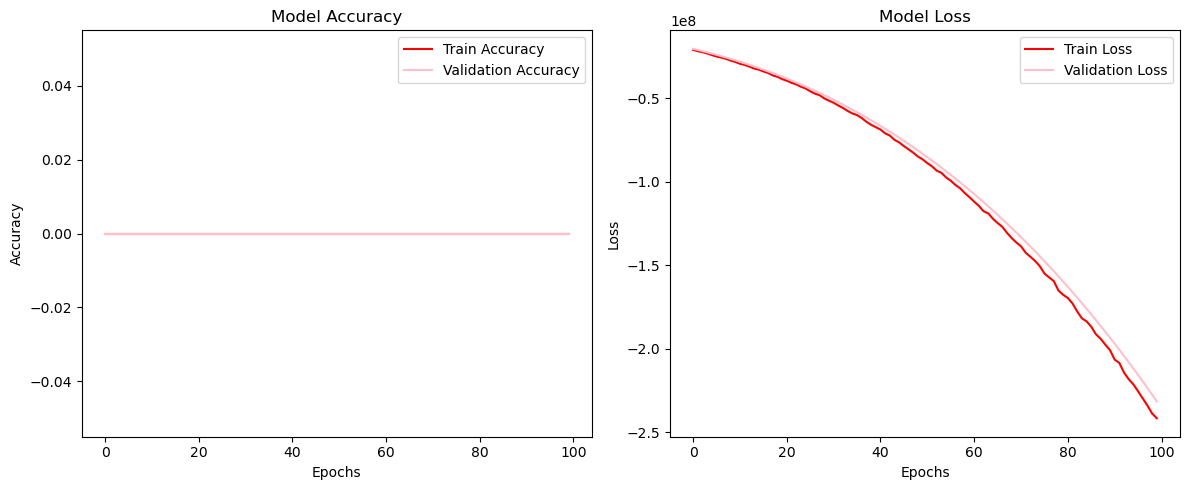

In [43]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', c="red")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', c="pink")
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', c='red')
plt.plot(history.history['val_loss'], label='Validation Loss',c='pink')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Save the Model
Save the trained model for submission.

In [ ]:
model.save("ANN_Task")

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: